In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3
import pandas as pd
import os
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Assignment 2: Main Assignment

##### Objective: Make sure PUIDATA environmental variable is set up correctly.

In [2]:
#check for PUIDATA env variable
os.getenv("PUIDATA")

'/nfshome/mrn291/PUIdata'

##### Objective: Read in data and display a sample

In [3]:
#point to Open Data URL for water consumption
url = 'https://data.cityofnewyork.us/resource/waf7-5gvc.json'

In [4]:
#read in data from Open Data
water_consumption = pd.read_json(url)

In [5]:
#take a look at the column names
water_consumption.columns

Index([u'new_york_city_population', u'nyc_consumption_million_gallons_per_day',
       u'per_capita_gallons_per_person_per_day', u'year'],
      dtype='object')

In [6]:
#take a look at the size of the data set
water_consumption.shape

(39, 4)

In [7]:
#take a look at the data types of the columns
water_consumption.dtypes

new_york_city_population                   float64
nyc_consumption_million_gallons_per_day    float64
per_capita_gallons_per_person_per_day        int64
year                                         int64
dtype: object

In [8]:
#take a look at the first seven rows
water_consumption.head(7)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985


##### Objective: Pick two numeric variables and plot them against each other.

In [9]:
#pick two numeric columns to plot
#clean up column names so they're prettier on the plot
water_plot = water_consumption[['new_york_city_population', 'nyc_consumption_million_gallons_per_day']]
water_plot.rename(columns={'new_york_city_population':'NYC Population','nyc_consumption_million_gallons_per_day':'Million Gallons of H20 Per Day'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [10]:
water_plot.head(5)

,NYC Population,Million Gallons of H20 Per Day
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0


In [11]:
#make the plot larger
plt.rcParams["figure.figsize"] = [16,9]

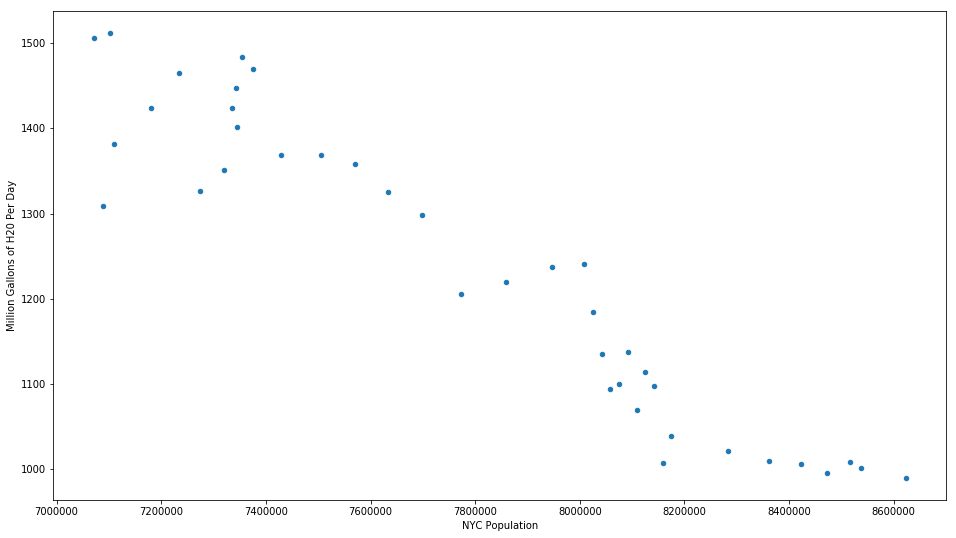

In [12]:
water_plot.plot(x="NYC Population", y="Million Gallons of H20 Per Day", kind='scatter')

Figure 1: Total population of New York City against million of gallons of water used per day as reported by the Department of Environmental Protection for the years between 1979 and 2017. It appears that as the population increases, daily water usage goes down.

### Assignment 2: Extra Credit

In [13]:
#point to Open Data URL for water consumption
url = 'https://data.cityofnewyork.us/resource/buih-g7ti.json'

In [14]:
#read in data
salt = pd.read_json(url)

In [15]:
#take a peek at the top
salt.head()

,bronx,brooklyn,date_of_report,dsny_storm,manhattan,queens,staten_island,total_tons
0,2059,2690,2016-01-19T00:00:00.000,Storm 1,1111,6625,2931,15416
1,4567,5521,2016-01-23T00:00:00.000,Storm 2,2919,9253,4264,26524
2,8167,12290,2016-01-24T00:00:00.000,Storm 2,6582,17133,5411,49583
3,4094,6217,2016-01-25T00:00:00.000,Storm 2,3862,10236,1256,25665
4,3299,5120,2016-01-26T00:00:00.000,Storm 2,2499,7685,764,19367


In [16]:
#make sure there's a date time column
salt.dtypes

bronx              int64
brooklyn           int64
date_of_report    object
dsny_storm        object
manhattan          int64
queens             int64
staten_island      int64
total_tons         int64
dtype: object

In [17]:
#make the date column a date
salt['date_of_report'] = salt['date_of_report'].astype(datetime64)

In [18]:
salt_brooklyn = salt[['date_of_report', 'brooklyn']]
salt_brooklyn.rename(columns={'date_of_report':'Report Date','brooklyn':'Tons of Salt in Brooklyn'}, inplace=True)

In [19]:
salt_brooklyn.head(7)

,Report Date,Tons of Salt in Brooklyn
0,2016-01-19,2690
1,2016-01-23,5521
2,2016-01-24,12290
3,2016-01-25,6217
4,2016-01-26,5120
5,2016-01-27,4619
6,2016-01-28,2889


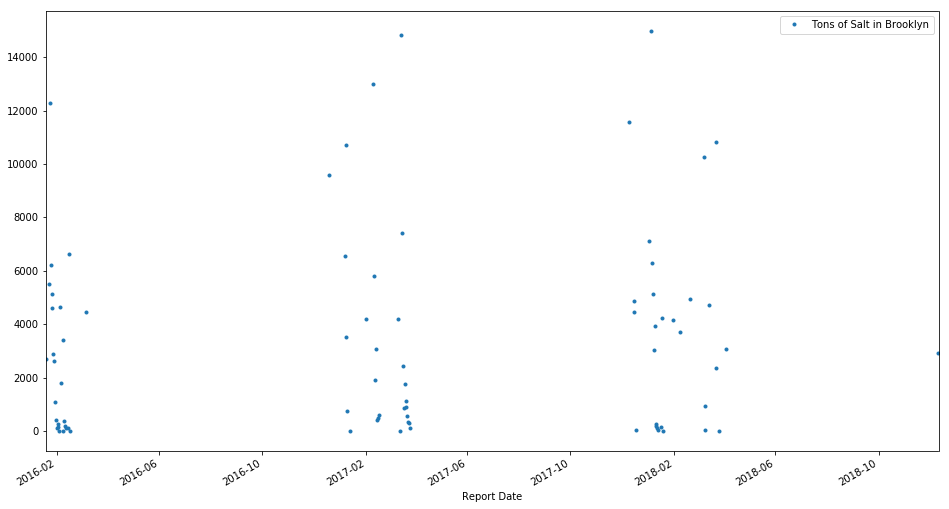

In [20]:
salt_brooklyn.plot(x='Report Date', y='Tons of Salt in Brooklyn', style = '.')

Figure 1: Storm report date against tons of salt used per day in Brooklyn as reported by the Department of Sanitation for storms from 2016 to the present. It appears salt usage increased for storms in 2017 and 2018 relative to storms in 2016.

Question: I ran into [this issue](https://stackoverflow.com/questions/27472548/pandas-scatter-plotting-datetime) when trying to make a scatter plot with a datetime column.  Is there a better way to handle this?  Should I not have converted the column into a datetime? 